title: Detecting Melanoma with Deep Learning Homework 3

tags:
- deep-learning
- ml
- image classification 
- HLS
- Python
- tensorflow
- tensorboard
libraries:
  - pypi:
      package: mxnet
      package: tensorflow-hub

#Detecting Melanoma with Deep Learning

Melanoma is one of the mostly deadliest forms of skin cancer with over 75,000 cases in the US each year.

Melanoma is also hard to detect as not all skin moles and lesions are cancerous. 

This demo is based on the [ISIC 2017](https://challenge.kitware.com/#challenge/583f126bcad3a51cc66c8d9a): Skin Lesion Analysis Towards Melanoma Detection Contest Sponsored by the *International Skin Imaging Collaboration*

##0. Cluster Setup

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

Driver: p2.xlarge, Workers: 1 * p2.xlarge

PyPi Libraries
  - mxnet
  - tensorflow-hub
  
Tested on demo, azure and field-eng shards

##1. Using s3 Mount to the Kaggle Dataset and bring into your Cluster Environment

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

In [0]:
%sh
sudo apt-get install s3fs
pip install torch-utils

Reading package lists...
Building dependency tree...
Reading state information...
s3fs is already the newest version (1.82-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.
Requirement already satisfied: torch-utils in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (0.1.2)
Requirement already satisfied: torch in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from torch-utils) (1.6.0)
Requirement already satisfied: future in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from torch->torch-utils) (0.18.2)
Requirement already satisfied: numpy in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from torch->torch-utils) (1.18.1)
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv

In [0]:
dbutils.fs.ls("/FileStore/tables/tanvi_patel_accessKeys.csv")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/tanvi_patel_accessKeys.csv', name='tanvi_patel_accessKeys.csv', size=96)]

In [0]:
file_type = "csv"
first_row_header="true"
delimiter = ","
aws_keys_df = spark.read.format(file_type)\
.option("header", first_row_header)\
.option("sep",delimiter)\
.load("/FileStore/tables/tanvi_patel_accessKeys.csv")

In [0]:
from pyspark.sql.functions import *
import urllib
ACCESS_KEY= aws_keys_df.select('Access key ID').collect()[0][0]
SECRET_KEY=aws_keys_df.select('Secret access key').collect()[0][0]
ENCODED_SECRET_KEY=urllib.parse.quote(SECRET_KEY,"")

In [0]:
print(SECRET_KEY)

6bNZC1jFDgAZjrOAHPeL/Kk09/1sbFWzArI27qm6

In [0]:
AWS_S3_BUCKET="melanomatrain"
MOUNT_NAME="/mnt/melanoma1"
url= "s3a://%s:%s@%s" % (ACCESS_KEY, ENCODED_SECRET_KEY, AWS_S3_BUCKET)
#dbutils.fs.mount(url, MOUNT_NAME)

In [0]:
%fs ls dbfs:/mnt/melanoma1

path,name,size
dbfs:/mnt/melanoma1/ISIC_0015719.jpg,ISIC_0015719.jpg,1911615
dbfs:/mnt/melanoma1/ISIC_0052212.jpg,ISIC_0052212.jpg,138515
dbfs:/mnt/melanoma1/ISIC_0068279.jpg,ISIC_0068279.jpg,215755
dbfs:/mnt/melanoma1/ISIC_0074268.jpg,ISIC_0074268.jpg,1649943
dbfs:/mnt/melanoma1/ISIC_0074311.jpg,ISIC_0074311.jpg,1247749
dbfs:/mnt/melanoma1/ISIC_0074542.jpg,ISIC_0074542.jpg,1224191
dbfs:/mnt/melanoma1/ISIC_0075663.jpg,ISIC_0075663.jpg,361738
dbfs:/mnt/melanoma1/ISIC_0075914.jpg,ISIC_0075914.jpg,1056730
dbfs:/mnt/melanoma1/ISIC_0076262.jpg,ISIC_0076262.jpg,1210343
dbfs:/mnt/melanoma1/ISIC_0076545.jpg,ISIC_0076545.jpg,523919


##2. Using Kaggle API to Download the Data
### Got to the https://www.kaggle.com/c/siim-isic-melanoma-classification/overview and download the train dataset (from the jpeg folder)

Datbricks Runtime 5.3 ML (includes Apache Spark 2.4.0, GPU , Scala 2.11)

In [0]:
%sh pip install kaggle

Requirement already satisfied: kaggle in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (1.5.12)
Requirement already satisfied: urllib3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (1.25.8)
Requirement already satisfied: python-slugify in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (5.0.2)
Requirement already satisfied: python-dateutil in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (2.8.1)
Requirement already satisfied: certifi in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (2020.6.20)
Requirement already satisfied: six>=1.10 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (1.14.0)
Requirement already satisfied: tqdm in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (4.42.1)
Requirement already satisfied: requests in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from kaggle) (2.22.0)
Requirement already satisfied: text-unidecode>=1.3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from python-slugify->kaggle) (1.3)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests->kaggle) (2.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests->kaggle) (3.0.4)
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv

In [0]:
%sh


kaggle --version
pip install --upgrade pip

Traceback (most recent call last):
 File "/databricks/conda/envs/databricks-ml-gpu/bin/kaggle", line 5, in <module>
 from kaggle.cli import main
 File "/databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
 api.authenticate()
 File "/databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
 self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Requirement already satisfied: pip in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (21.3.1)
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv

The following commands download the files from the kaggle api, but take some time to run and the files we need are already in the dbfs

In [0]:
#%sh
#export KAGGLE_USERNAME="kylearbide"
#export KAGGLE_KEY="2f2f6f925ce7563df475676b03c5d84c"
#kaggle competitions download -c siim-isic-melanoma-classification 


In [0]:
#%fs cp -r file:/databricks/driver/siim-isic-melanoma-classification.zip dbfs:/tmp

In [0]:
%sh
export KAGGLE_USERNAME="kylearbide"
export KAGGLE_KEY="2f2f6f925ce7563df475676b03c5d84c"
kaggle competitions download -c siim-isic-melanoma-classification -f train.csv 

0%| | 0.00/339k [00:00<?, ?B/s]
100%|██████████| 339k/339k [00:00<00:00, 25.1MB/s]
Downloading train.csv.zip to /databricks/driver

In [0]:
#%fs cp -r file:/databricks/driver/train.csv.zip dbfs:/tmp

In [0]:
#%sh unzip /dbfs/tmp/siim-isic-melanoma-classification.zip

In [0]:
#%sh unzip /dbfs/tmp/train.csv.zip

##3. Load the Labels from a CSV File and Explore the Data
### Got to the https://www.kaggle.com/c/siim-isic-melanoma-classification/overview and download the training labels (train.csv)
#### Load the train.csv file into Databricks using the Data Upload in the Workspace.

In [0]:
labels = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/FileStore/train.csv")

In [0]:
display(labels)

image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
ISIC_0074542,IP_4698288,male,25.0,lower extremity,unknown,benign,0
ISIC_0075663,IP_6017204,female,35.0,torso,unknown,benign,0
ISIC_0075914,IP_7622888,male,30.0,torso,unknown,benign,0
ISIC_0076262,IP_5075533,female,50.0,lower extremity,unknown,benign,0


In [0]:
display(labels.groupBy("diagnosis").count())

diagnosis,count
seborrheic keratosis,135
solar lentigo,7
cafe-au-lait macule,1
unknown,27124
nevus,5193
lentigo NOS,44
lichenoid keratosis,37
atypical melanocytic proliferation,1
melanoma,584


In [0]:
labels = labels.withColumnRenamed("image_name", "image_id")

In [0]:
melanoma = labels.where("target = 1" )
benign = labels.where("target = 0" )

### 4. Create a Dataframe named "labels" and count the benign and malignant examples in the dataset

In [0]:
display(labels.groupBy("benign_malignant").count())

benign_malignant,count
malignant,584
benign,32542


In [0]:
display(labels.groupBy("benign_malignant").count())

benign_malignant,count
malignant,584
benign,32542


## 5. Cache Data to the SSD
Use code provided below

In [0]:
import os
import shutil

# Import these two packages to time out the caching for troubleshooting
import multiprocessing
import time


def cacheFilesAndReturn(images, subdir):
  file_dir = '/tmp/training/'+subdir+'/'
  try:
    os.makedirs(str(file_dir))
  except:
    pass
  for image_id in images:
    shutil.copyfile("/dbfs/mnt/melanoma1/%s.jpg" % image_id, str(file_dir)+"%s.jpg" % image_id)
    
def timeOut(process, seconds):
  process.start()
  time.sleep(seconds)
  process.terminate()
  process.join()

### 6. We will only run the Cache statements for around 30 seconds to bring in a sample of the data into memory
Use the code below to cache the data

In [0]:
testState = True
if testState == True:
  melanomaProcess = multiprocessing.Process(target=cacheFilesAndReturn, name="cacheFilesAndReturn",args=(melanoma.select("image_id").rdd.map(lambda x: x[0]).collect(), "melanoma"))
  timeOut(melanomaProcess, 30)
else:
  cacheFilesAndReturn(melanoma.select("image_id").rdd.map(lambda x: x[0]).collect(), "melanoma")

In [0]:
if testState == True:
  benignProcess = multiprocessing.Process(target=cacheFilesAndReturn, name="cacheFilesAndReturn", args=(benign.select("image_id").rdd.map(lambda x: x[0]).collect(), "benign"))
  timeOut(benignProcess, 30)
else:
  cacheFilesAndReturn(benign.select("image_id").rdd.map(lambda x: x[0]).collect(), "benign")

##7. Explore the Dataset - Add additional Exploratory Steps
Hints: *Better understand if the labels match the training data.

In [0]:
%sh 
pip install mxnet
pip install tensorflow_hub
pip install tf_slim

Requirement already satisfied: mxnet in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (1.8.0.post0)
Requirement already satisfied: numpy<2.0.0,>1.16.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from mxnet) (1.18.1)
Requirement already satisfied: requests<3,>=2.20.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from mxnet) (2.22.0)
Requirement already satisfied: graphviz<0.9.0,>=0.8.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from mxnet) (0.8.4)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (1.25.8)
Requirement already satisfied: idna<2.9,>=2.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (2.8)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (2020.6.20)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from requests<3,>=2.20.0->mxnet) (3.0.4)
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv
Requirement already satisfied: tensorflow_hub in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (0.12.0)
Requirement already satisfied: numpy>=1.12.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow_hub) (1.18.1)
Requirement already satisfied: protobuf>=3.8.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow_hub) (3.11.4)
Requirement already satisfied: six>=1.9 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from protobuf>=3.8.0->tensorflow_hub) (1.14.0)
Requirement already satisfied: setuptools in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from protobuf>=3.8.0->tensorflow_hub) (45.2.0.post20200210)
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv
Requirement already satisfied: tf_slim in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (1.1.0)
Requirement already satisfied: absl-py>=0.2.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tf_slim) (0.9.0)
Requirement already satisfied: six in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from absl-py>=0.2.2->tf_slim) (1.14.0)
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import mxnet
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow_hub as hub
#import tensorflow as tf
import tf_slim as slim
import pandas as pd

In [0]:
pip list

Package Version
---------------------------- -------------------
absl-py 0.9.0
asn1crypto 1.3.0
astor 0.8.0
astunparse 1.6.3
azure-core 1.8.0
azure-storage-blob 12.4.0
backcall 0.1.0
bcrypt 3.2.0
blinker 1.4
boto3 1.12.0
botocore 1.15.0
cachetools 4.1.1
certifi 2020.6.20
cffi 1.14.0
chardet 3.0.4
Click 7.0
cloudpickle 1.3.0
configparser 3.7.4
cryptography 2.8
cycler 0.10.0
Cython 0.29.15
databricks-cli 0.11.0
decorator 4.4.1
dill 0.3.1.1
diskcache 5.0.2
docker 4.3.1
docutils 0.15.2
entrypoints 0.3
Flask 1.1.1
flatbuffers 2.0
future 0.18.2
gast 0.3.3
gitdb 4.0.5
GitPython 3.1.0
google-auth 1.11.2
google-auth-oauthlib 0.4.1
google-pasta 0.2.0
gorilla 0.3.0
graphviz 0.8.4
grpcio 1.27.2
gunicorn 20.0.4
h5py 2.10.0
horovod 0.19.5
idna 2.8
ipykernel 5.1.4
ipython 7.12.0
ipython_genutils 0.2.0
isodate 0.6.0
itsdangerous 1.1.0
jedi 0.14.1
Jinja2 2.11.1
jmespath 0.10.0
joblib 0.14.1
joblibspark 0.2.0
jupyter-client 5.3.4
jupyter-core 4.6.1
kaggle 1.5.12
keras 2.7.0
Keras-Preprocessing 1.1.2
kiwisolver 1.1.0
koalas 1.2.0
libclang 12.0.0
lightgbm 2.3.0
Mako 1.1.2
Markdown 3.1.1
MarkupSafe 1.1.1
matplotlib 3.1.3
mkl-fft 1.0.15
mkl-random 1.1.0
mkl-service 2.3.0
mleap 0.16.1
mlflow 1.11.0
msrest 0.6.18
mxnet 1.8.0.post0
networkx 2.4
nltk 3.4.5
numpy 1.18.1
oauthlib 3.1.0
olefile 0.46
opt-einsum 3.3.0
packaging 20.1
pandas 1.0.1
paramiko 2.7.1
parso 0.5.2
patsy 0.5.1
petastorm 0.9.5
pexpect 4.8.0
pickleshare 0.7.5
Pillow 7.0.0
pip 21.3.1
plotly 4.9.0
prompt-toolkit 3.0.3
protobuf 3.11.4
psutil 5.6.7
psycopg2 2.8.6
ptyprocess 0.6.0
pyarrow 1.0.1
pyasn1 0.4.8
pyasn1-modules 0.2.7
pycparser 2.19
Pygments 2.5.2
PyJWT 1.7.1
PyNaCl 1.3.0
pyodbc 4.0.0-unsupported
pyOpenSSL 19.1.0
pyparsing 2.4.6
PySocks 1.7.1
python-dateutil 2.8.1
python-editor 1.0.4
python-slugify 5.0.2
pytz 2019.3
PyYAML 5.3.1
pyzmq 18.1.1
querystring-parser 1.2.4
requests 2.22.0
requests-oauthlib 1.3.0
retrying 1.3.3
rsa 4.0
s3transfer 0.3.3
scikit-learn 0.22.1
scipy 1.4.1
seaborn 0.10.0
setuptools 45.2.0.post20200210
simplejson 3.17.0
six 1.14.0
smmap 3.0.4
spark-tensorflow-distributor 0.1.0
sqlparse 0.3.0
statsmodels 0.11.0
tabulate 0.8.3
tensorboard 2.7.0
tensorboard-data-server 0.6.1
tensorboard-plugin-wit 1.7.0
tensorflow 2.3.0
tensorflow-estimator 2.7.0
tensorflow-gpu 2.7.0
tensorflow-hub 0.12.0
tensorflow-io-gcs-filesystem 0.21.0
termcolor 1.1.0
text-unidecode 1.3
tf-slim 1.1.0
torch 1.6.0
torch-utils 0.1.2
torchvision 0.7.0
tornado 6.0.3
tqdm 4.42.1
traitlets 4.3.3
typing-extensions 3.10.0.2
urllib3 1.25.8
wcwidth 0.1.8
websocket-client 0.56.0
Werkzeug 1.0.0
wheel 0.34.2
wrapt 1.11.2
xgboost 1.1.1

In [0]:
labels.columns

Out[28]: ['image_id',
 'patient_id',
 'sex',
 'age_approx',
 'anatom_site_general_challenge',
 'diagnosis',
 'benign_malignant',
 'target']

In [0]:
display(labels.groupBy(["benign_malignant","target"]).count())
#verifies our target labels

benign_malignant,target,count
malignant,1,584
benign,0,32542


In [0]:
display(labels.groupBy(["Sex","target"]).count())

Sex,target,count
male,0,16716
female,1,220
female,0,15761
null,0,65
male,1,364


In [0]:
ages = labels.groupBy(["age_approx","target"]).count().sort(["age_approx"])
display(ages)

age_approx,target,count
null,0,68
0.0,0,2
10.0,0,17
15.0,1,2
15.0,0,130
20.0,0,649
20.0,1,6
25.0,1,16
25.0,0,1528
30.0,0,2334


In [0]:
agesex = labels.groupBy(["Sex","age_approx","target"]).count().sort(["age_approx","Sex"])
display(agesex)

Sex,age_approx,target,count
null,null,0,65
female,null,0,3
male,0.0,0,2
female,10.0,0,10
male,10.0,0,7
female,15.0,0,77
female,15.0,1,2
male,15.0,0,53
female,20.0,0,299
female,20.0,1,3


In [0]:
display(agesex)

Sex,age_approx,target,count
null,null,0,65
female,null,0,3
male,0.0,0,2
female,10.0,0,10
male,10.0,0,7
female,15.0,0,77
female,15.0,1,2
male,15.0,0,53
female,20.0,0,299
female,20.0,1,3


In [0]:
melanomaImg = "/tmp/training/melanoma/" + os.listdir("/tmp/training/melanoma/")[0]
benignImg = "/tmp/training/benign/" + os.listdir("/tmp/training/benign/")[0]
print(melanomaImg)
print(benignImg)

/tmp/training/melanoma/ISIC_1881133.jpg
/tmp/training/benign/ISIC_0148465.jpg

In [0]:
with open(melanomaImg, 'rb') as fp:
  str_image = fp.read()

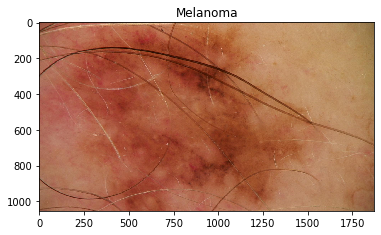

In [0]:
plt.imshow(mxnet.image.imdecode(open(melanomaImg, 'rb').read()).asnumpy())
plt.title("Melanoma")
display(plt.show())

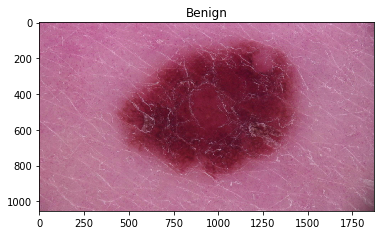

In [0]:
plt.imshow(mxnet.image.imdecode(open(benignImg, 'rb').read()).asnumpy())
plt.title("Benign")
display(plt.show())

In [0]:
mxnet.image.imdecode(open(melanomaImg, 'rb').read()).asnumpy()

Out[21]: array([[[166, 155, 163],
 [166, 155, 163],
 [165, 154, 162],
 ...,
 [183, 173, 198],
 [183, 173, 198],
 [182, 172, 197]],

 [[167, 156, 164],
 [166, 155, 163],
 [165, 154, 162],
 ...,
 [183, 173, 198],
 [183, 173, 198],
 [182, 172, 197]],

 [[168, 156, 166],
 [167, 155, 165],
 [166, 154, 164],
 ...,
 [183, 173, 198],
 [182, 172, 197],
 [182, 172, 197]],

 ...,

 [[157, 139, 137],
 [158, 140, 138],
 [159, 141, 139],
 ...,
 [123, 99, 112],
 [123, 99, 112],
 [122, 98, 111]],

 [[157, 139, 137],
 [156, 138, 136],
 [155, 137, 135],
 ...,
 [125, 99, 112],
 [124, 98, 111],
 [124, 98, 111]],

 [[157, 139, 137],
 [154, 136, 134],
 [151, 133, 131],
 ...,
 [124, 98, 111],
 [124, 98, 111],
 [124, 98, 111]]], dtype=uint8)

##8.Train the Model using a Convolution Neural Network

Here we will use transfer learning to train an image classifier. 
It uses feature vectors computed by Inception V3 trained on ImageNet

<img src="https://cdn-images-1.medium.com/max/1800/0*mH17FEz4LHpaJrPb.png" alt="drawing" width="800"/>

In [0]:
%sh
wget https://raw.githubusercontent.com/tensorflow/tensorflow/c565660e008cf666c582668cb0d0937ca86e71fb/tensorflow/examples/image_retraining/retrain.py

--2021-11-10 00:44:30-- https://raw.githubusercontent.com/tensorflow/tensorflow/c565660e008cf666c582668cb0d0937ca86e71fb/tensorflow/examples/image_retraining/retrain.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43142 (42K) [text/plain]
Saving to: ‘retrain.py.1’

 0K .......... .......... .......... .......... .. 100% 71.6M=0.001s

2021-11-10 00:44:30 (71.6 MB/s) - ‘retrain.py.1’ saved [43142/43142]

In [0]:
#File is already in tmp folder but this is how we could move it
#%fs cp -r file:/databricks/driver/retrain.py dbfs:/tmp

In [0]:
%sh ls -al /tmp

total 100
drwxrwxrwt 1 root root 4096 Nov 10 00:44 .
drwxr-xr-x 1 root root 4096 Nov 9 23:53 ..
drwxrwxrwt 2 root root 4096 Nov 9 23:53 .ICE-unix
drwxrwxrwt 2 root root 4096 Nov 9 23:53 .Test-unix
drwxrwxrwt 2 root root 4096 Nov 9 23:53 .X11-unix
drwxrwxrwt 2 root root 4096 Nov 9 23:53 .XIM-unix
drwxrwxrwt 2 root root 4096 Nov 9 23:53 .font-unix
drwxr-xr-x 3 root root 4096 Nov 9 23:55 Rserv
drwx------ 2 root root 4096 Nov 9 23:55 Rtmp8cpRpR
-rw-r--r-- 1 root root 22 Nov 9 23:54 chauffeur-daemon-params
-rw-r--r-- 1 root root 4 Nov 9 23:54 chauffeur-daemon.pid
-rw-r--r-- 1 root root 156 Nov 9 23:54 chauffeur-env.sh
-rw-r--r-- 1 root root 466 Nov 9 23:54 custom-spark.conf
-rw-r--r-- 1 root root 19 Nov 9 23:54 driver-daemon-params
-rw-r--r-- 1 root root 4 Nov 9 23:54 driver-daemon.pid
-rw-r--r-- 1 root root 3053 Nov 9 23:54 driver-env.sh
drwxr-xr-x 2 root root 4096 Nov 9 23:54 hsperfdata_root
-rw-r--r-- 1 root root 21 Nov 9 23:54 master-params
drwxrwxrwt 2 root root 4096 Nov 9 23:54 rstudio-rsession
-rw-r--r-- 1 root root 4 Nov 9 23:54 spark-root-org.apache.spark.deploy.master.Master-1.pid
drwx------ 3 root root 4096 Nov 9 23:54 systemd-private-9dcb57b0174b42969f6e27322e21f3d0-apache2.service-DjGrwY
drwx------ 3 root root 4096 Nov 9 23:53 systemd-private-9dcb57b0174b42969f6e27322e21f3d0-ntp.service-5u5TtW
drwx------ 3 root root 4096 Nov 9 23:53 systemd-private-9dcb57b0174b42969f6e27322e21f3d0-systemd-resolved.service-VUY9uO
-rw------- 1 root root 0 Nov 9 23:54 tmp.6gjUPjfYeH
drwxr-xr-x 4 root root 4096 Nov 9 23:59 training

### 9. Take the model you just downloaded and edit the model and update it so that it works in databricks
Hint: Add in the following import statements "import tensorflow.compat.v1 as tf" "tf.disable_v2_behavior()""

In [0]:
%sh pip uninstall -y  tensorflow-gpu

Found existing installation: tensorflow-gpu 1.15.5
Uninstalling tensorflow-gpu-1.15.5:
 Successfully uninstalled tensorflow-gpu-1.15.5
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv

In [0]:
%sh
pip install "tensorflow-gpu~=1.0"
pip install "tensorflow-hub[make_image_classifier]~=0.6"

Collecting tensorflow-gpu~=1.0
 Using cached tensorflow_gpu-1.15.5-cp37-cp37m-manylinux2010_x86_64.whl (411.0 MB)
Requirement already satisfied: astor>=0.6.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (0.8.0)
Requirement already satisfied: google-pasta>=0.1.6 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (0.2.0)
Requirement already satisfied: keras-preprocessing>=1.0.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.1.2)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (3.3.0)
Requirement already satisfied: absl-py>=0.7.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (0.9.0)
Requirement already satisfied: protobuf>=3.6.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (3.11.4)
Requirement already satisfied: keras-applications>=1.0.8 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.0.8)
Requirement already satisfied: grpcio>=1.8.6 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.27.2)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.1.0)
Requirement already satisfied: tensorboard<1.16.0,>=1.15.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.15.0)
Requirement already satisfied: wrapt>=1.11.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.11.2)
Requirement already satisfied: wheel>=0.26 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (0.34.2)
Requirement already satisfied: six>=1.10.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.14.0)
Requirement already satisfied: tensorflow-estimator==1.15.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.15.1)
Requirement already satisfied: gast==0.2.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (0.2.2)
Requirement already satisfied: h5py<=2.10.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (2.10.0)
Requirement already satisfied: numpy<1.19.0,>=1.16.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=1.0) (1.18.1)
Requirement already satisfied: setuptools in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from protobuf>=3.6.1->tensorflow-gpu~=1.0) (45.2.0.post20200210)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorboard<1.16.0,>=1.15.0->tensorflow-gpu~=1.0) (1.0.0)
Requirement already satisfied: markdown>=2.6.8 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorboard<1.16.0,>=1.15.0->tensorflow-gpu~=1.0) (3.1.1)
Installing collected packages: tensorflow-gpu
Successfully installed tensorflow-gpu-1.15.5
WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv
Requirement already satisfied: tensorflow-hub[make_image_classifier]~=0.6 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (0.12.0)
Requirement already satisfied: numpy>=1.12.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-hub[make_image_classifier]~=0.6) (1.18.1)
Requirement already satisfied: 

In [0]:
%sh 
ls /dbfs/tmp/

HMGA.html
abeloual1
dnaseq
hive
jpeg.zip
labels.txt
melanoma.pb
melanoma1
menaru
mlflow
mru
retrain.py
siim-isic-melanoma-classification.zip
train
training

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

WARNING:tensorflow:From /databricks/python/lib/python3.7/site-packages/tensorflow_core/python/compat/v2_compat.py:68: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term

In [0]:
%sh /databricks/python/bin/python3 -u "/dbfs/tmp/retrain.py" --image_dir "/dbfs/tmp/training"  --output_graph "/tmp/melanoma.pb"

WARNING:tensorflow:From /dbfs/tmp/retrain.py:1062: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

WARNING:tensorflow:From /dbfs/tmp/retrain.py:772: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

W1111 21:50:22.891591 140239061987520 module_wrapper.py:139] From /dbfs/tmp/retrain.py:772: The name tf.gfile.Exists is deprecated. Please use tf.io.gfile.exists instead.

WARNING:tensorflow:From /dbfs/tmp/retrain.py:774: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.

W1111 21:50:22.891783 140239061987520 module_wrapper.py:139] From /dbfs/tmp/retrain.py:774: The name tf.gfile.MakeDirs is deprecated. Please use tf.io.gfile.makedirs instead.


>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.0%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.1%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.2%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.3%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.4%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.5%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.6%
>> Downloading inception-2015-12-05.tgz 0.7%
>> Downloading ince

In [0]:
%sh ls /dbfs/tmp/

HMGA.html
abeloual1
dnaseq
hive
jpeg.zip
labels.txt
melanoma.pb
melanoma1
menaru
mlflow
mru
retrain.py
siim-isic-melanoma-classification.zip
train
training

In [0]:
%sh
ls /dbfs/user/

andres.ramos@ccnoai.com
benjamin.harvey@ccnoai.com
bobrie14@jhu.edu
dkuang2@jh.edu
dyao11@jh.edu
fchang16@jhmi.edu
hive
iakujobi@bowiestate.edu
lwei25@jh.edu
nicholas.falcon@maxar.com
rerbe1@jhmi.edu
staphordbengesi@gmail.com
szhan121@jhu.edu
tnewtonwh@gmail.com
xzhan251@jh.edu

In [0]:
%fs ls 

In [0]:
dbutils.fs.cp("file:/tmp/melanoma.pb", "dbfs:/melanoma/melanoma.pb", True)

Out[80]: True

In [0]:
dbutils.fs.cp('file:/tmp/retrain_logs', 'dbfs:/melanoma/', True)

Out[74]: True

### 10. Download a different pretrained model and conduct transfer learning and train the model to add additional melanoma and benign features

In [0]:
%sh
%sh pip uninstall -y  tensorflow-gpu
pip install "tensorflow-gpu~=2.0"
pip install "tensorflow-hub[make_image_classifier]~=0.6"

/bin/bash: line 0: fg: no job control
Collecting tensorflow-gpu~=2.0
 Downloading tensorflow_gpu-2.7.0-cp37-cp37m-manylinux2010_x86_64.whl (489.6 MB)
Requirement already satisfied: wrapt>=1.11.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.11.2)
Collecting typing-extensions>=3.6.6
 Downloading typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)
Requirement already satisfied: h5py>=2.9.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (2.10.0)
Requirement already satisfied: grpcio<2.0,>=1.24.3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.27.2)
Collecting tensorboard~=2.6
 Downloading tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
Requirement already satisfied: absl-py>=0.4.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.9.0)
Collecting tensorflow-estimator<2.8,~=2.7.0rc0
 Downloading tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
Requirement already satisfied: gast<0.5.0,>=0.2.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.2.2)
Requirement already satisfied: wheel<1.0,>=0.32.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.34.2)
Requirement already satisfied: google-pasta>=0.1.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (0.2.0)
Requirement already satisfied: termcolor>=1.1.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.1.0)
Requirement already satisfied: astunparse>=1.6.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.6.3)
Collecting libclang>=9.0.1
 Downloading libclang-12.0.0-py2.py3-none-manylinux1_x86_64.whl (13.4 MB)
Collecting flatbuffers<3.0,>=1.12
 Downloading flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
Requirement already satisfied: numpy>=1.14.5 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.18.1)
Collecting keras<2.8,>=2.7.0rc0
 Downloading keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
Requirement already satisfied: protobuf>=3.9.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (3.11.4)
Requirement already satisfied: six>=1.12.0 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.14.0)
Collecting tensorflow-io-gcs-filesystem>=0.21.0
 Downloading tensorflow_io_gcs_filesystem-0.22.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.1 MB)
Requirement already satisfied: opt-einsum>=2.3.2 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (3.3.0)
Requirement already satisfied: keras-preprocessing>=1.1.1 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorflow-gpu~=2.0) (1.1.2)
Requirement already satisfied: setuptools in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from protobuf>=3.9.2->tensorflow-gpu~=2.0) (45.2.0.post20200210)
Collecting tensorboard-data-server<0.7.0,>=0.6.0
 Downloading tensorboard_data_server-0.6.1-py3-none-manylinux2010_x86_64.whl (4.9 MB)
Requirement already satisfied: werkzeug>=0.11.15 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (1.0.0)
Requirement already satisfied: markdown>=2.6.8 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (3.1.1)
Requirement already satisfied: google-auth<3,>=1.6.3 in /databricks/conda/envs/databricks-ml-gpu/lib/python3.7/site-packages (from tensorboard~=2.6->tensorflow-gpu~=2.0) (1.11.2)
Requirement already satisfied: requests<3,>=2.21.0 in /databricks/conda/envs/databr

In [0]:
import tensorflow.compat.v1 as tf

In [0]:
%sh
cd /dbfs/tmp/
make_image_classifier \
  --image_dir  "/dbfs/tmp/training" \
  --tfhub_module https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 \
  --saved_model_dir /dbfs/tmp \
  --labels_output_file class_labels.txt \
  --tflite_output_file new_mobile_model.tflite \
  --summaries_dir my_log_dir

2021-11-10 04:45:58.113919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 04:45:58.113966: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-10 04:45:59.971758: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-10 04:45:59.972687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 04:45:59.972761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-11-10 04:45:59.972822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-11-10 04:45:59.974886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-10 04:45:59.974953: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusparse.so.11'; dlerror: libcusparse.so.11: cannot open shared object file: No such file or directory
2021-11-10 04:45:59.975009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-11-10 04:45:59.975025: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
I1110 04:45:59.977415 140422607098048 resolver.py:106] Using /tmp/tfhub_modules to cache modules.
2021-11-10 04:46:00.147334: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations: AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
WARNING:tensorflow:AutoGraph could not transform <function _get_data_as_datasets.<locals>.<lambda> at 0x7fb65e5afcb0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
W1110 04:46:05.067539 140422607098048 ag_logging.py:146] AutoGraph could not transform <function _get_data_as_datasets.<locals>.<lambda> at 0x7fb65e5afcb0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Using module https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4 with image size (224, 224)
Found 33126 files belonging to 2 classes.
Using 26501 files for training.
WARNING:tensorflow:AutoGraph could not transform <function _

In [0]:
dbutils.fs.mkdirs("/dbfs/tmp/new_mobile_model.tflite")

Out[25]: True

##11. Scoring Images using a Convolution Neural Network

In [0]:
dbutils.fs.mkdirs("file:/tmp/retrain_logs")

Out[77]: True

In [0]:
dbutils.fs.cp('dbfs:/melanoma/train', 'file:/tmp/retrain_logs', True)

Out[78]: True

In [0]:
dbutils.fs.cp('dbfs:/melanoma/melanoma.pb', 'file:/tmp/melanoma.pb', True)

Out[79]: True

In [0]:
with tf.gfile.FastGFile("/tmp/melanoma.pb", 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    _ = tf.import_graph_def(graph_def, name='')

In [0]:
def displayPrediction(img_path, label):
  image_data = tf.gfile.FastGFile(img_path, 'rb').read()
  with tf.Session() as sess:
    # Feed the image_data as input to the graph and get first prediction
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    
    predictions = sess.run(softmax_tensor, \
             {'DecodeJpeg/contents:0': image_data})
    
    # Sort to show labels of first prediction in order of confidence
    #top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]
    plt.imshow(mxnet.image.imdecode(open(img_path, 'rb').read()).asnumpy())
    plt.title(label)
    plt.figtext(0,0,'Model Prediction: Not Cancer: %.5f, Cancer: %.5f' % (predictions[0][1], predictions[0][0]))
    display(plt.show())
    plt.close()

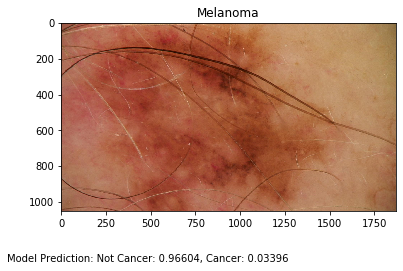

In [0]:
displayPrediction(melanomaImg, "Melanoma")

The first model incorrectly classifies the melanoma image

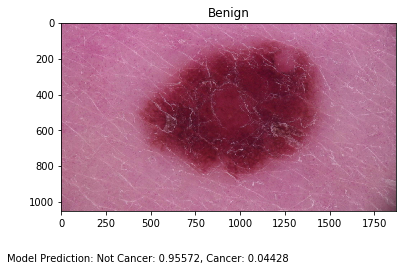

In [0]:
displayPrediction(benignImg, "Benign")

In [0]:
dbutils.tensorboard.start("file:/tmp/retrain_logs")

TensorBoard log directory set to: file:/tmp/retrain_logs. 
 View TensorBoard

In [0]:
dbutils.tensorboard.stop()

Looking for active tensorboard process...
Active tensorboard process killed...
Out[108]: True

RUNNING PREDICTIONS ON THE SECOND MODEL

Import the "label_image" script from tensorflow

In [0]:
%sh
wget https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/lite/examples/python/label_image.py

--2021-11-10 21:00:12-- https://raw.githubusercontent.com/tensorflow/tensorflow/master/tensorflow/lite/examples/python/label_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2990 (2.9K) [text/plain]
Saving to: ‘label_image.py’

 0K .. 100% 43.4M=0s

2021-11-10 21:00:12 (43.4 MB/s) - ‘label_image.py’ saved [2990/2990]

In [0]:
%fs cp -r file:/databricks/driver/label_image.py dbfs:/tmp

res0: Boolean = true

In [0]:
%sh
cd /dbfs/tmp/
python3 label_image.py \
  --model_file new_mobile_model.tflite --label_file class_labels.txt \
  --image /dbfs/tmp/training/benign/ISIC_0341663.jpg

2021-11-10 21:03:39.951168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 21:03:39.951209: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
0.940321: benign
0.059679: melanoma
time: 27.287ms

In [0]:
%sh
cd /dbfs/tmp/
python3 label_image.py \
  --model_file new_mobile_model.tflite --label_file class_labels.txt \
  --image /dbfs/tmp/training/melanoma/ISIC_0489267.jpg

2021-11-10 21:05:13.121958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-10 21:05:13.121996: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
0.982522: benign
0.017478: melanoma
time: 27.005ms

The second model is also able to predict but also incorrectly categorizes the melanoma image